# Clustering
The exercises on this sheet are graded by a maximum of 25 points. You will be asked to implement several functions.Team work is not allowed. 

Everybody implements his/her own code. Discussing issues with others is fine, sharing code with others is not.

If you use any code fragments found on the Internet, make sure you reference them properly.

In this exercise we will use unsupervised methods for clustering, in this case instead of having $X$ and $Y$ pairs at train time, we only have the input data $X$ at train time.

Let's work with 2 popular methods: K-means and Mean-shift.

## Dataset
To get familiar with the adavantages and disanvantages of the methods, we will use 3 different datasets:

1.Toy data (2-Dimensional blob data that is easy to visualize) for warm up.

2.2-D spiral data

3.Country data including some socio-economic and health factors that can jointly determine the overall development of the country. We will use K-means and mean-shift methods on this dataset to make decision to choose the countries that are in the direst need of aid.

### Data Dictionary
- country = Name of the country
- child_mort = Death of children under 5 years of age per 1000 live births
- exports = Exports of goods and services. Given as %age of the Total GDP
- health = Total health spending as %age of Total GDP
- imports = Imports of goods and services. Given as %age of the Total GDP
- income = Net income per person
- inflation = The measurement of the annual growth rate of the Total GDP
- life_expec = The average number of years a new born child would live if the current mortality patterns are to remain the same
- total_fer = The number of children that would be born to each woman if the current age-fertility rates remain the same
- gdpp = The GDP per capita. Calculated as the Total GDP divided by the total population

## Objectives
1. Learn to cluster data by kmeans and mean-shift approaches provided by scikit-learn library.
2. Understand and implement mean-shift algorithm on your own.

## Contents:
1) [scikit-learn K-means]

1a) [Toy dataset: blobs] (3 points)

1b) [Toy dataset: spirals] (3 points)

1c) [Country dataset] (5 points)

2) [scikit-learn Mean-shift]

2a) [Toy dataset: blobs] (3 points)

2b) [Toy dataset: spirals] (3 points)

2c) [Country dataset] (3 points)

3) [Your own Mean-shift implemention] (5 points)

### Submission Link: 

https://docs.google.com/forms/d/e/1FAIpQLSfIVTqPddQkT_yMYxUEOouwsa_SdjnoHYp2UeI4jBuybRByUA/viewform?usp=sf_link

### Submission Deadline: 

23:59, 12 May, 2022

## 1) sklearn K-means

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
%matplotlib inline 

### 1a) Toy dataset: blobs
- Load toy dataset (blobs).

In [17]:
data_blobs = np.genfromtxt('data/toy_data.csv', delimiter=',')

- Use sklearn kmeans function (parameters by default) to cluster points.

In [18]:
kmeans = KMeans(random_state = 0).fit(data_blobs)

- Plot clustering results by ```plt.scatter()```

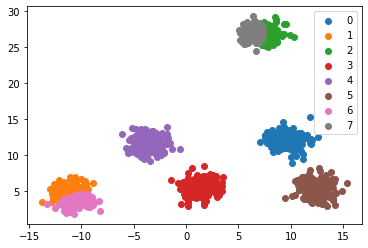

In [20]:
# Get all the labels
preds = kmeans.fit_predict(data_blobs)
labels = np.unique(preds)
 
# Plot the results:
 
for i in labels:
    plt.scatter(data_blobs[preds == i , 0] , data_blobs[preds == i , 1] , label = i)
plt.legend()
plt.show()

- Choosing the number of n_clusters without extra information is not trivial. For these blobs data, we don't have any labels. Which configurations do you think are be the best for this dataset? How many n_clusters would you choose?
- Plot your results.

ANSWER : I would leave the default parameters of kmeans (which are `init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')`, but would set `n_clusters` to `6`. 

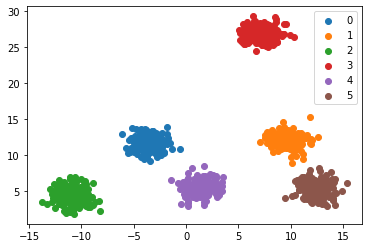

In [21]:
kmeans = KMeans(n_clusters=6, random_state = 0).fit(data_blobs)
preds = kmeans.fit_predict(data_blobs)
labels = np.unique(preds)
for i in labels:
    plt.scatter(data_blobs[preds == i , 0] , data_blobs[preds == i , 1] , label = i)
plt.legend()
plt.show()

### 1b) Spiral dataset
- Try to use the KMeans to cluster the Spiral dataset.

In [22]:
# load data
spiral = np.load("data/spiral.npz")['x']

- Use sklearn kmeans to cluster points.
- Plot your results

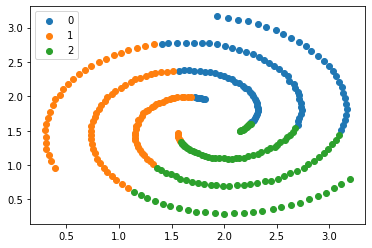

In [25]:
kmeans = KMeans(n_clusters=3, random_state = 0).fit(spiral)
preds = kmeans.fit_predict(spiral)
labels = np.unique(preds)
for i in labels:
    plt.scatter(spiral[preds == i , 0] , spiral[preds == i , 1] , label = i)
plt.legend()
plt.show()

- Does it work? Please explain your answer, which assumptions required for kmeans? 
- What limitations do you think K-means would have?

ANSWER: 
- Kmeans clustering does not work for this dataset because it partitions $n$ observations into $k$ clusters such that each observation belongs to the cluster with the nearest mean. With the spiral dataset, the concentric spirals have the exact same mean so kmeans is not suitable to separate them, and instead clusters the point as plotted above (I set `n_clusters=3` to make the phenomenon more visible).
- The limitations of kmeans include: having to choose the number of clusters, the lack of scaling with an increasing number of dimensions, the centroids' sensitivity to outliers.


### 1c) Country development dataset

In [34]:
# Load data
df_country=pd.read_csv('data/country_data.csv')

In [36]:
# See the first records of dataframe
df_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [37]:
# Print the dtypes in the dataframe
df_country.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [38]:
# Print dataframe shape
df_country.shape


(167, 10)

In [40]:
# See the data description
df_country.describe()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


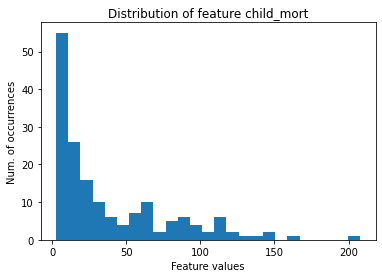

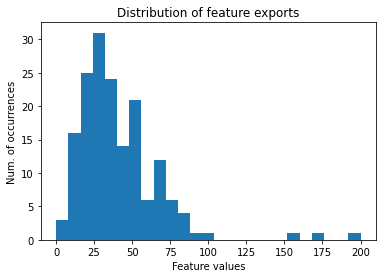

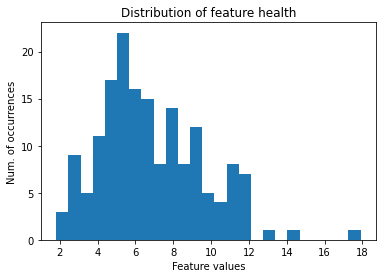

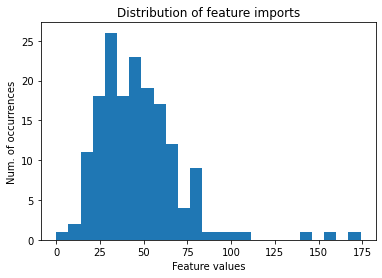

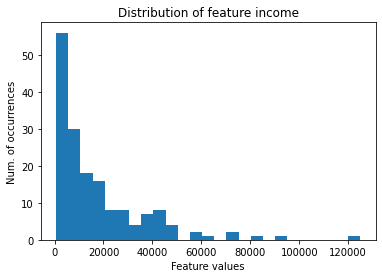

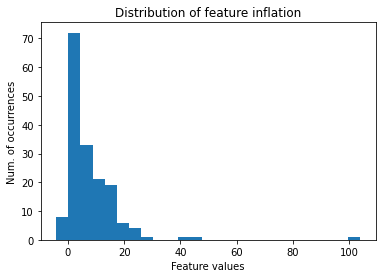

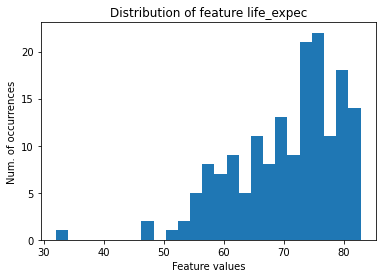

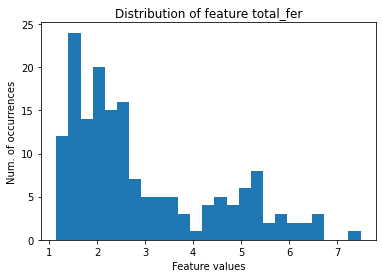

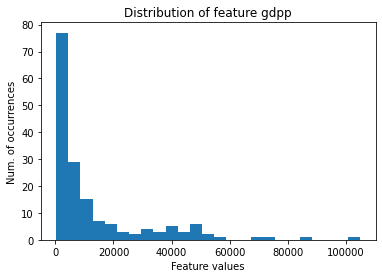

In [49]:
# Visualise distribution of features (plot 9 figures)
for feature in df_country.iloc[:,1:].columns :
  ft_vals = df_country[feature].values
  plt.hist(ft_vals, bins=25)
  plt.xlabel('Feature values')
  plt.ylabel('Num. of occurrences')
  plt.title('Distribution of feature {}'.format(feature))
  plt.show()

- Cluster the samples based on health factors(child_mort, life_expec, total_fer)
- Print the result (countries belonging to different clusters E.g. Label-1: [A, B, C], Label-2: [D, E])

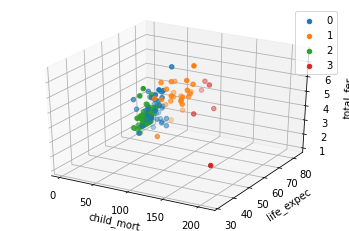

Countries belonging to cluster 0 : 
['Azerbaijan' 'Bangladesh' 'Bhutan' 'Bolivia' 'Botswana' 'Cambodia'
 'Congo, Rep.' 'Dominican Republic' 'Eritrea' 'Gabon' 'Guatemala' 'Guyana'
 'India' 'Indonesia' 'Iraq' 'Kenya' 'Kiribati' 'Kyrgyz Republic'
 'Madagascar' 'Micronesia, Fed. Sts.' 'Morocco' 'Myanmar' 'Namibia'
 'Nepal' 'Philippines' 'Rwanda' 'Senegal' 'Solomon Islands' 'South Africa'
 'Tajikistan' 'Tanzania' 'Timor-Leste' 'Turkmenistan' 'Uzbekistan'
 'Vanuatu' 'Yemen']

Countries belonging to cluster 1 : 
['Afghanistan' 'Angola' 'Benin' 'Burkina Faso' 'Burundi' 'Cameroon'
 'Comoros' 'Congo, Dem. Rep.' "Cote d'Ivoire" 'Equatorial Guinea' 'Gambia'
 'Ghana' 'Guinea' 'Guinea-Bissau' 'Lao' 'Lesotho' 'Liberia' 'Malawi'
 'Mauritania' 'Mozambique' 'Niger' 'Pakistan' 'Sudan' 'Togo' 'Uganda'
 'Zambia']

Countries belonging to cluster 2 : 
['Albania' 'Algeria' 'Antigua and Barbuda' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Bahamas' 'Bahrain' 'Barbados' 'Belarus' 'Belgium'
 'Belize' 'Bosnia an

In [78]:
health_data = df_country[['child_mort', 'life_expec', 'total_fer']].values
kmeans = KMeans(n_clusters = 4, random_state = 0).fit(health_data)
preds = kmeans.fit_predict(health_data)
labels = np.unique(preds)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for i in labels:
  ax.scatter(health_data[preds == i , 0] , health_data[preds == i , 1] , health_data[preds == i , 2], label = i)
ax.set_xlabel('child_mort')
ax.set_ylabel('life_expec')
ax.set_zlabel('total_fer')
plt.legend()
plt.show()

for i in labels: 
  print('Countries belonging to cluster {} : '.format(i))
  print(np.unique(df_country[preds == i]['country'].values))
  print()

- Visualize Kmeans clustering results


In [70]:
def visualise(data, idx):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data.values[:,0],data.values[:,1],data.values[:,2],marker='.', c=idx)
    ax.set_xlabel(data.columns[0])
    ax.set_ylabel(data.columns[1])
    ax.set_zlabel(data.columns[2])  
    plt.show()

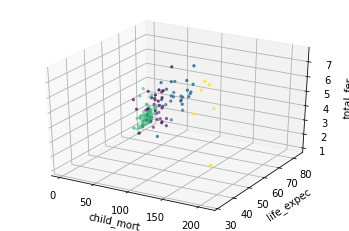

In [79]:
visualise(df_country[['child_mort', 'life_expec', 'total_fer']], preds)


- Cluster the samples based on economic factors('income', 'gdpp', 'health')
- Print the result (countries belonging to different clusters E.g. Label-1: [A, B, C], Label-2: [D, E])

In [85]:
econ_data = df_country[['income', 'gdpp', 'health']]
kmeans = KMeans(n_clusters = 5, random_state = 0).fit(econ_data)
preds = kmeans.fit_predict(econ_data)
labels = np.unique(preds)

for i in labels: 
  print('Countries belonging to cluster {} : '.format(i))
  print(np.unique(df_country[preds == i]['country'].values))
  print()

Countries belonging to cluster 0 : 
['Algeria' 'Antigua and Barbuda' 'Argentina' 'Azerbaijan' 'Barbados'
 'Belarus' 'Botswana' 'Brazil' 'Bulgaria' 'Chile' 'Colombia' 'Costa Rica'
 'Croatia' 'Dominican Republic' 'Estonia' 'Gabon' 'Grenada' 'Hungary'
 'Iran' 'Iraq' 'Kazakhstan' 'Latvia' 'Lebanon' 'Lithuania'
 'Macedonia, FYR' 'Malaysia' 'Maldives' 'Mauritius' 'Montenegro' 'Panama'
 'Poland' 'Romania' 'Russia' 'Serbia' 'Seychelles' 'South Africa'
 'Suriname' 'Thailand' 'Turkey' 'Uruguay' 'Venezuela']

Countries belonging to cluster 1 : 
['Australia' 'Austria' 'Belgium' 'Brunei' 'Canada' 'Denmark' 'Finland'
 'France' 'Germany' 'Iceland' 'Ireland' 'Japan' 'Kuwait' 'Netherlands'
 'Singapore' 'Sweden' 'Switzerland' 'United Arab Emirates'
 'United Kingdom' 'United States']

Countries belonging to cluster 2 : 
['Afghanistan' 'Albania' 'Angola' 'Armenia' 'Bangladesh' 'Belize' 'Benin'
 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Burkina Faso' 'Burundi'
 'Cambodia' 'Cameroon' 'Cape Verde' 'Centra

- Visualize Kmeans clustering results

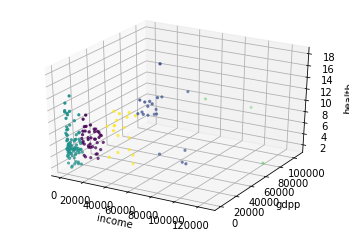

In [86]:
visualise(econ_data,  preds)

- Cluster the samples based on all attributes
- Print the result (countries belonging to different clusters E.g. Label-1: [A, B, C], Label-2: [D, E])

In [92]:
all_attributes = df_country.iloc[:, 1:]
kmeans = KMeans(n_clusters = 5, random_state = 0).fit(all_attributes)
preds = kmeans.fit_predict(all_attributes)
labels = np.unique(preds)

for i in labels: 
  print('Countries belonging to cluster {} : '.format(i))
  print(np.unique(df_country[preds == i]['country'].values))
  print()

Countries belonging to cluster 0 : 
['Algeria' 'Antigua and Barbuda' 'Argentina' 'Azerbaijan' 'Barbados'
 'Belarus' 'Botswana' 'Brazil' 'Bulgaria' 'Chile' 'Colombia' 'Costa Rica'
 'Croatia' 'Dominican Republic' 'Estonia' 'Gabon' 'Grenada' 'Hungary'
 'Iran' 'Iraq' 'Kazakhstan' 'Latvia' 'Lebanon' 'Lithuania'
 'Macedonia, FYR' 'Malaysia' 'Maldives' 'Mauritius' 'Montenegro' 'Panama'
 'Poland' 'Romania' 'Russia' 'Serbia' 'Seychelles' 'South Africa'
 'Suriname' 'Thailand' 'Turkey' 'Uruguay' 'Venezuela']

Countries belonging to cluster 1 : 
['Australia' 'Austria' 'Belgium' 'Brunei' 'Canada' 'Denmark' 'Finland'
 'France' 'Germany' 'Iceland' 'Ireland' 'Japan' 'Kuwait' 'Netherlands'
 'Singapore' 'Sweden' 'Switzerland' 'United Arab Emirates'
 'United Kingdom' 'United States']

Countries belonging to cluster 2 : 
['Afghanistan' 'Albania' 'Angola' 'Armenia' 'Bangladesh' 'Belize' 'Benin'
 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Burkina Faso' 'Burundi'
 'Cambodia' 'Cameroon' 'Cape Verde' 'Centra

## 2) sklearn mean-shift

In [93]:
from sklearn.cluster import MeanShift

### 2a) Toy dataset: blobs

- Use sklearn meanshift function to cluster points.

In [94]:
clustering = MeanShift().fit(data_blobs)

- Plot clustering results 

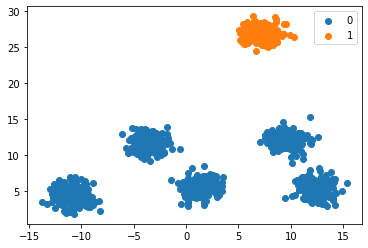

In [95]:
preds = clustering.predict(data_blobs)

# Get all the labels
labels = np.unique(preds)
 
# Plot the results:
 
for i in labels:
    plt.scatter(data_blobs[preds == i , 0] , data_blobs[preds == i , 1] , label = i)
plt.legend()
plt.show()

- Try different hyper-parameters (i.e. bandwidth, which is an important parameter for mean-shift) and plot the results.

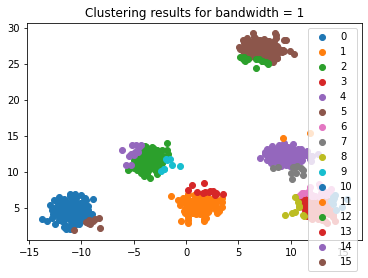

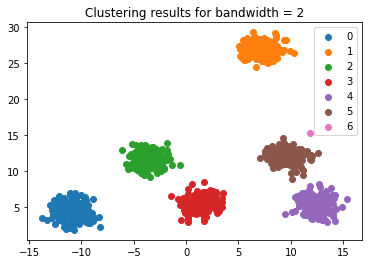

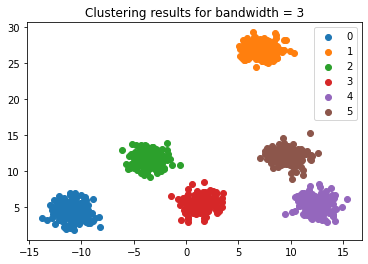

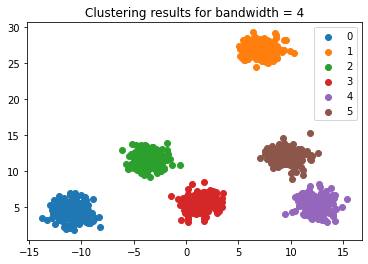

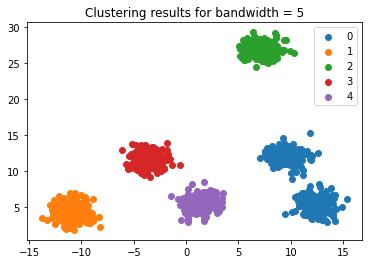

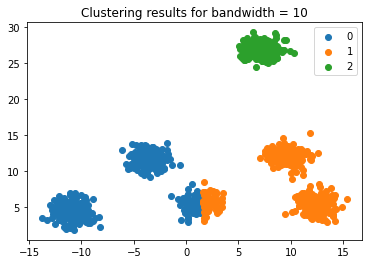

In [98]:
for bw in [1, 2, 3, 4, 5, 10] : 
  clustering = MeanShift(bandwidth = bw).fit(data_blobs)
  preds = clustering.predict(data_blobs)
  labels = np.unique(preds)
  for i in labels:
      plt.scatter(data_blobs[preds == i , 0] , data_blobs[preds == i , 1] , label = i)
  plt.legend()
  plt.title('Clustering results for bandwidth = {}'.format(bw))
  plt.show()

### 2b) Toy dataset: spiral

- Use the Mean-shift to cluster the Spiral dataset.
- Plot the results.

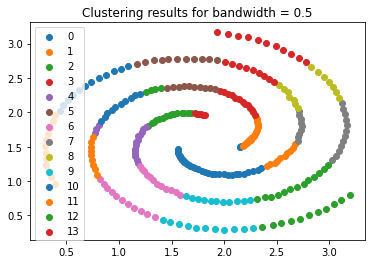

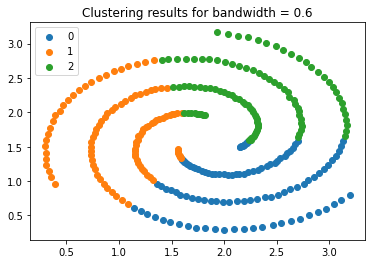

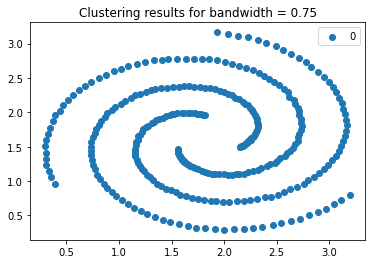

In [103]:
for bw in [0.5, 0.6, 0.75] : 
  clustering = MeanShift(bandwidth = bw).fit(spiral)
  preds = clustering.predict(spiral)
  labels = np.unique(preds)
  for i in labels:
      plt.scatter(spiral[preds == i , 0] , spiral[preds == i , 1] , label = i)
  plt.legend()
  plt.title('Clustering results for bandwidth = {}'.format(bw))
  plt.show()

- Does it work?
- What kind of data cluster is this approach better at discovering?
- (Optional) Brainstorm: do you have a solution for this dataset? 

ANSWERS:
- Mean shift does not work on this dataset, either.
- This approach seems better at discovering data that is clustered is similar sized, round-shaped, clusters.
- We could project the data.

### 2c) Country development dataset

- Cluster the samples based on all attributes
- Print the result (countries belonging to different clusters E.g. Label-1: [A, B, C], Label-2: [D, E])

In [106]:
clustering = MeanShift().fit(all_attributes)
preds = clustering.predict(all_attributes)
labels = np.unique(preds)

In [107]:
for i in labels: 
  print('Countries belonging to cluster {} : '.format(i))
  print(np.unique(df_country[preds == i]['country'].values))
  print()

Countries belonging to cluster 0 : 
['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Azerbaijan' 'Bangladesh' 'Barbados' 'Belarus'
 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon'
 'Cape Verde' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Congo, Dem. Rep.' 'Congo, Rep.' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Eritrea'
 'Estonia' 'Fiji' 'Gabon' 'Gambia' 'Georgia' 'Ghana' 'Grenada' 'Guatemala'
 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Hungary' 'India' 'Indonesia'
 'Iran' 'Iraq' 'Jamaica' 'Jordan' 'Kazakhstan' 'Kenya' 'Kiribati'
 'Kyrgyz Republic' 'Lao' 'Latvia' 'Lebanon' 'Lesotho' 'Liberia' 'Libya'
 'Lithuania' 'Macedonia, FYR' 'Madagascar' 'Malawi' 'Malaysia' 'Maldives'
 'Mali' 'Mauritania' 'Mauritius' 'Micronesia, Fed. Sts.' 'Moldova'
 'Mongolia' 'Montenegro' 'Morocco' 'Mo

- Which countries do you think are in the direst need of aid based on your results?

ANSWER: 

Using prior knowledge (i.e. by personal, biased, knowledge of the world situation) and the results, the countries part of cluster 0 seem to be those in direst need of aid.

## 3) Your own Mean-shift implementation

Let's implement mean-shift algorithm ourselves.

Complete the function ml_meanshift that performs the mean shift algorithm. The function takes 3 arguments:

- input data: sample points in a N-by-2 matrix (number of rows is the number of samples, dimensionality of the input data will always be 2 for this exercise)
- the kernel bandwidth $h$
- the stopping threshold $\vartheta$

It should return two values:

- cluster indexes: a column vector with N rows, specifying the cluster index for each sample
- cluster modes: a M-by-2 matrix, returning the cluster modes (the points with the highest density) for each cluster (where M is the number of clusters)

For this task, use the Epanechnikov kernel. Luckily all terms before the sum cancel out in the mean shift formula, leading to

$$
\mathbf{q}_{t+1} = \frac{
\sum_{i=1}^N \mathbf{x}_i
\max\left(0, 1 - \frac{|\mathbf{q}_t - \mathbf{x}i|^2}{h^2} \right)
} {
\sum_{i=1}^N
\max\left(0, 1 - \frac{|\mathbf{q}_t - \mathbf{x}_i|^2}{h^2} \right)
}
$$

Start the mean shift procedure at each point and iterate until $|\mathbf{q}_{t}-\mathbf{q}_{t-1}| < \vartheta$ where $\vartheta$ is the threshold passed to the function. Additionally also count the iterations and add it as condtion so the loop does not run infinitely. You can use $200$ as the maximum value of iteration.

When the iteration stopped, decide if a cluster mode already exists that is closer than $\frac{h}{5}$. If yes, assign the point that you started at to this cluster. Otherwise, create a new cluster and assign the point to the new cluster.

In [3]:
import math
from numpy import linalg as la
import numpy.matlib

In [4]:
# DO NOT MODIFY
def visualise_kmeans(data,idx,centers,updated=None):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.scatter(data[:,0],data[:,1],marker='.', c=idx)
    ax.plot(centers[:,0],centers[:,1],'+',color='r',markersize=15,mew=2)
    plt.show()
def test_meanshift():
    data = np.genfromtxt('data/toy_data.csv', delimiter=',')
    idx, centers = ml_meanshift(data,4,0.001)
    
    centers_2 = np.array(centers)
    
    visualise_kmeans(data=data,idx=idx,centers=centers_2)

In [23]:
def ml_meanshift(data,h,theta):
    # ml_meanshift returns cluster indices and modes from computed with meanshift algorithm

    # initialization 
    #initialize modes
    modes = []

    #initialize index variable for data points
    index = []

    #s = number of data points
    s = len(data)

    #take i-th element as query point
    for i in range(s):
        x = data[i]

        #initialize starting q0 and q1 condition
        qt = x
        qtp1 = sum([xi * max(0, 1 - la.norm(qt - xi) ** 2 / h ** 2) for xi in data]) / sum([max(0, 1 - la.norm(qt - xi) ** 2 / h ** 2) for xi in data])

        #iteration initilization
        it = 0

        #iterate until ||q_t - q_t-1|| < theta or it>=200
        while((la.norm(qt - qtp1) >= theta) and (it < 200)):
            #update break criterion values
            qt = qtp1

            #compute q_t+1
            qtp1 = sum([xi * max(0, 1 - la.norm(qt - xi) ** 2 / h ** 2) for xi in data]) / sum([max(0, 1 - la.norm(qt - xi) ** 2 / h ** 2) for xi in data])

            #update iteration
            it = it+1
          
        #check for clusters in the vicinity
        #1st condition: if mode is not empty
        #2nd: if a cluster mode exists closer than h/5
        #else create a new cluster
        if(len(modes) > 0) :
          distances = np.array([la.norm(qtp1 - mode) for mode in modes])
          min_dist = np.min(distances)
          if(min_dist < h/5) :
            index.append(np.argmin(distances))
          else:
            index.append(len(modes))
            modes.append(qtp1)
            
        else:
          index.append(len(modes))
          modes.append(qtp1)
          

    return index, modes

The above is the reference code framework we provide. You are highly encouraged to follow the comments to complete the function. (If it is really difficult for you, you can also implement this function in your own way. Please note that the input arguments and output values should not be modified.)

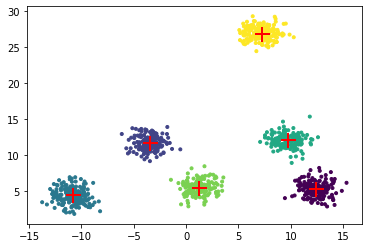

In [25]:
# test and visualise your results
test_meanshift()